
1)	Data cleaning and preprocessing (at minimum have the following:  Removing unnecessary columns or data, Removing Twitter Handles( @user ), Removing punctuation, numbers, special characters, Removing stop words, Tokenization, and Stemming, TFIDF vectors, POS tagging, checking for missing values , train/test split of data).
2)	Data Visualization and analysis for critical steps (WordCloud, Bar plots, etc) 
3)	Model building and successfully executing the model to make prediction. 




First thing is to install the required libaries

In [ ]:
import pandas as pd

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize


import nltk
nltk.download("popular")

Reading the data csv file mentioned in the ICP 3 outline

In [35]:
data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

The first few codes will be looking at the data. To see what is all in there. 

In [36]:
data.size #Return an int representing the number of elements in this object.

95886

In [ ]:
data #displays the data in the csv file


If I want to look at only the first 10

In [ ]:
data.head(10) #looking at first 10

Removing the a column. I will remove the id label and would like to only see the label and tweets only.

In [39]:
#axis meaning:	Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
#inplace meaning: 	If True, do operation inplace and return None.
data.drop('id',axis=1,inplace=True) #Will drop the column . The axis one means it will drop the column and axis = 0 means it will drop the row. Inplace is used to True to make sure it occurs. 

In [40]:
data.head(5) # now looking at the data after the id column has been removed 

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


Converting the tweet text to string

In [ ]:
# it is good to convert to string because the vartion of data types that could be present. 
tweet_text = pd.Series(data.tweet.head(20)).to_string() #It read the 20 values from the column and stored into variable tweet_text
print(type(tweet_text))
print('\n')
print(tweet_text) #printing the data
print('\n')

In [42]:
sentences = sent_tokenize(tweet_text) #using a build in function to tokenize tweet_text


print ("# sentences: ", len(sentences)) 
print('\n')


sentences

# sentences:  10




["0      @user when a father is dysfunctional and is s...\n1     @user @user thanks for #lyft credit i can't us...\n2                                   bihday your majesty\n3     #model   i love u take with u all the time in ...\n4                factsguide: society now    #motivation\n5     [2/2] huge fan fare and big talking before the...\n6      @user camping tomorrow @user @user @user @use...\n7     the next school year is the year for exams.ð\x9f\x98...\n8     we won!!!",
 'love the land!!!',
 '#allin #cavs #champ...\n9      @user @user welcome here !',
 "i'm   it's so #gr...\n10     â\x86\x9d #ireland consumer price index (mom) climb...\n11    we are so selfish.",
 '#orlando #standwithorlando ...\n12    i get to see my daddy today!!',
 "#80days #getti...\n13    @user #cnn calls #michigan middle school 'buil...\n14    no comment!",
 'in #australia   #opkillingbay #se...\n15    ouch...junior is angryð\x9f\x98\x90#got7 #junior #yugyo...\n16    i am thankful for having a paner.',
 '#

Tokenization is breaking up sequence of strings or a sentence into just single words, symbols, phrases, or any other element that could be present. 

In [43]:

words = word_tokenize(tweet_text) #this will create a of list of each word. using build in fucntion 

#How many words are there? :
print (len(words))
print("\n")

#Print words :
print (words)

246


['0', '@', 'user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 's', '...', '1', '@', 'user', '@', 'user', 'thanks', 'for', '#', 'lyft', 'credit', 'i', 'ca', "n't", 'us', '...', '2', 'bihday', 'your', 'majesty', '3', '#', 'model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', '...', '4', 'factsguide', ':', 'society', 'now', '#', 'motivation', '5', '[', '2/2', ']', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'the', '...', '6', '@', 'user', 'camping', 'tomorrow', '@', 'user', '@', 'user', '@', 'user', '@', 'use', '...', '7', 'the', 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'exams.ð\x9f\x98', '...', '8', 'we', 'won', '!', '!', '!', 'love', 'the', 'land', '!', '!', '!', '#', 'allin', '#', 'cavs', '#', 'champ', '...', '9', '@', 'user', '@', 'user', 'welcome', 'here', '!', 'i', "'m", 'it', "'s", 'so', '#', 'gr', '...', '10', 'â\x86\x9d', '#', 'ireland', 'consumer', 'price', 'index', '(', 'mom', ')', 'climb', '...', '11', 'we'

In [44]:

from nltk.probability import FreqDist #using pre build functino to see the distrubution 


fdist = FreqDist(words) # this determine the frequency 

fdist.most_common(10) #getting the most common

[('#', 23),
 ('...', 18),
 ('!', 12),
 ('@', 11),
 ('user', 10),
 ('i', 5),
 ('the', 5),
 ('is', 4),
 ('for', 3),
 ('all', 3)]

In [ ]:

import matplotlib.pyplot as plt #plotting the data

fdist.plot(10)

**Cleaing data**
Now i will show two ways to remove the uncessary character from the file. 

The first demo

In [46]:
import re
tweet_text_2 = re.sub("[^A-Za-z]+"," ",tweet_text) # the character are removed and space is added. 
print(tweet_text_2)
print('\n')

 user when a father is dysfunctional and is s user user thanks for lyft credit i can t us bihday your majesty model i love u take with u all the time in factsguide society now motivation huge fan fare and big talking before the user camping tomorrow user user user use the next school year is the year for exams we won love the land allin cavs champ user user welcome here i m it s so gr ireland consumer price index mom climb we are so selfish orlando standwithorlando i get to see my daddy today days getti user cnn calls michigan middle school buil no comment in australia opkillingbay se ouch junior is angry got junior yugyo i am thankful for having a paner thankful p retweet if you agree its friday smiles all around via ig use as we all know essential oils are not made of 




In [47]:
#Tokenize the text with words :
words_2 = word_tokenize(tweet_text_2) #passing in tweet_text_2

#How many words are there? :
print (len(words_2))
print("\n")

#Print words :
print (words_2)

151


['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 's', 'user', 'user', 'thanks', 'for', 'lyft', 'credit', 'i', 'can', 't', 'us', 'bihday', 'your', 'majesty', 'model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'factsguide', 'society', 'now', 'motivation', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'the', 'user', 'camping', 'tomorrow', 'user', 'user', 'user', 'use', 'the', 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'exams', 'we', 'won', 'love', 'the', 'land', 'allin', 'cavs', 'champ', 'user', 'user', 'welcome', 'here', 'i', 'm', 'it', 's', 'so', 'gr', 'ireland', 'consumer', 'price', 'index', 'mom', 'climb', 'we', 'are', 'so', 'selfish', 'orlando', 'standwithorlando', 'i', 'get', 'to', 'see', 'my', 'daddy', 'today', 'days', 'getti', 'user', 'cnn', 'calls', 'michigan', 'middle', 'school', 'buil', 'no', 'comment', 'in', 'australia', 'opkillingbay', 'se', 'ouch', 'junior', 'is', 'angry', 'got', 'junior', 'yugyo', 'i',

In [48]:
#Import required libraries :
from nltk.probability import FreqDist

#Find the frequency :
fdist_2 = FreqDist(words_2)

#Print 10 most common words :
fdist_2.most_common(10)

[('user', 10),
 ('i', 5),
 ('the', 5),
 ('is', 4),
 ('for', 3),
 ('all', 3),
 ('we', 3),
 ('a', 2),
 ('and', 2),
 ('s', 2)]

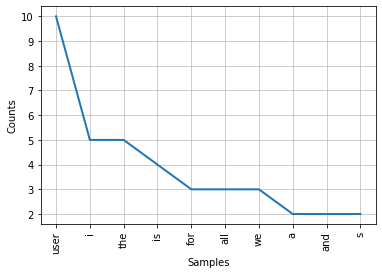

In [49]:
#Plot the graph for fdist :
import matplotlib.pyplot as plt

fdist_2.plot(10)

second demo

An empty list is created and the words are stored. 
Then a for loop is used to check if all characters in each string in series are alphabetic(a-z/A-Z). Whitespace or any other character occurrence in the string would return false, but if there is a complete numeric value, then it would return NaN.

In [50]:
#Empty list to store words:
words_no_punc = []

#Removing punctuation marks :
for w in words:
    if w.isalpha():
        words_no_punc.append(w.lower())

#Print the words without punctution marks :
print (words_no_punc)

print ("\n")

#Length :
print (len(words_no_punc))

['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 's', 'user', 'user', 'thanks', 'for', 'lyft', 'credit', 'i', 'ca', 'us', 'bihday', 'your', 'majesty', 'model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'factsguide', 'society', 'now', 'motivation', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'the', 'user', 'camping', 'tomorrow', 'user', 'user', 'user', 'use', 'the', 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'we', 'won', 'love', 'the', 'land', 'allin', 'cavs', 'champ', 'user', 'user', 'welcome', 'here', 'i', 'it', 'so', 'gr', 'ireland', 'consumer', 'price', 'index', 'mom', 'climb', 'we', 'are', 'so', 'selfish', 'orlando', 'standwithorlando', 'i', 'get', 'to', 'see', 'my', 'daddy', 'today', 'getti', 'user', 'cnn', 'calls', 'michigan', 'middle', 'school', 'no', 'comment', 'in', 'australia', 'opkillingbay', 'se', 'ouch', 'junior', 'is', 'junior', 'yugyo', 'i', 'am', 'thankful', 'for', 'having', 'a', 'paner', 'thankful', '

Now checking the frequency distribution 

In [51]:
#Frequency distribution :
fdist = FreqDist(words_no_punc)

fdist.most_common(10)

[('user', 10),
 ('i', 5),
 ('the', 5),
 ('is', 4),
 ('for', 3),
 ('all', 3),
 ('we', 3),
 ('a', 2),
 ('and', 2),
 ('love', 2)]

Now repeating the process again and show the graph analysis 

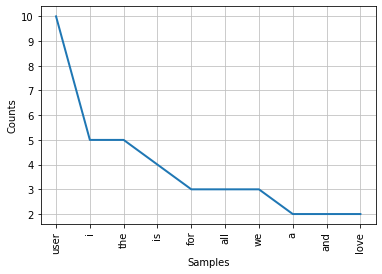

In [52]:

#Plot the most common words on grpah:

fdist.plot(10)

[link text](https://)Now I will be removing **stopwords**. Stopwords are words that are used frequently used in the english language. Do not add much meaning
...

Will need to import nltk. This give us easy access to a prebuild library which contains the stopwords. using this will allow us to remove the stopwords and check what is considered a stopword

In [53]:
import nltk
stopwords = nltk.corpus.stopwords.words("english")
stopwords[0:10] #only looking at the first 10

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Now to remove the stopwords. A function is created

First will need a store the clean words. Then 

In [54]:
filtered_list = [] # creating a blank list which the filitered stopwords
for word in words_no_punc: #will check for each word in words_no_punc
  if word not in stopwords:# check to see it is present or not then it wil be appened to the filitered list
    filtered_list.append(word)


In [ ]:
filtered_list #looking at the stopwords that have been removed. 


now looking at the distrbution

In [56]:

#Frequency distribution :
fdist = FreqDist(filtered_list)

fdist.most_common(10)

[('user', 10),
 ('love', 2),
 ('u', 2),
 ('use', 2),
 ('school', 2),
 ('year', 2),
 ('junior', 2),
 ('thankful', 2),
 ('father', 1),
 ('dysfunctional', 1)]

plotting the distribution

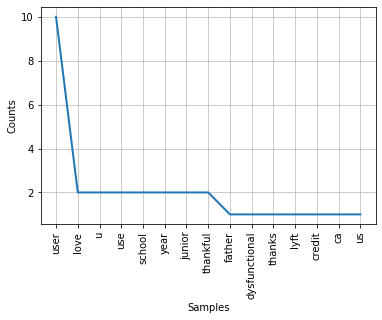

In [57]:
fdist.plot(15)

Now word stemming. This method will allow us to bring the words to their root form. 

In [58]:
from nltk.stem import PorterStemmer #Import stemming library 
porter_stemmer = PorterStemmer() 
input_data_test = "following and followed in the raning day.'"
input_data_test = nltk.word_tokenize(input_data_test)
#input_data = sentences
#input_data = nltk.word_tokenize(input_data[0])
for word in input_data_test:
  print(porter_stemmer.stem(word))

follow
and
follow
in
the
rane
day
.
'


In [59]:
#now just passing in the sentence based on the index
from nltk.stem import PorterStemmer #Import stemming library 
porter_stemmer = PorterStemmer() 
input_data = sentences
input_data = nltk.word_tokenize(input_data[0])
for word in input_data:
  print(porter_stemmer.stem(word))

0
@
user
when
a
father
is
dysfunct
and
is
s
...
1
@
user
@
user
thank
for
#
lyft
credit
i
ca
n't
us
...
2
bihday
your
majesti
3
#
model
i
love
u
take
with
u
all
the
time
in
...
4
factsguid
:
societi
now
#
motiv
5
[
2/2
]
huge
fan
fare
and
big
talk
befor
the
...
6
@
user
camp
tomorrow
@
user
@
user
@
user
@
use
...
7
the
next
school
year
is
the
year
for
exams.ð
...
8
we
won
!
!
!


Now passing in the list of words

In [ ]:

porter_stemmer_2 = PorterStemmer()

#Word-list for stemming :
word_list = words_no_punc 

for word in word_list:
    print(porter_stemmer_2.stem(word))

. The purpose of lemmatization is to reduce a word into its original dictionary root. 



In [61]:
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
word_list = ["studies","leaving","decreases","plays", "playing","affrimation"]

for w in word_list:
    print(lemmatizer.lemmatize(w ,pos="v"))


study
leave
decrease
play
play
affrimation


Now using the list of words from the data

In [ ]:
from nltk import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
word_list2 = words_no_punc

for word_ in word_list2:
    print(lemmatizer.lemmatize(word_ ,pos="v"))


It refers to the process of classifying words into their parts of speech (also known as words classes or lexical categories). 


pos tagging

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag
nltk.download('universal_tagset')
  

In [ ]:

(sentences[0])

In [ ]:
word_3 =word_tokenize(sentences[0])
for words in word_3:
    tagged_words = nltk.pos_tag(word_3,tagset= 'universal')
tagged_words

*TDIDF* The technique is used to quantify the words in a document and then compute the weight of each word, therefore signifying the importance of the word. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentences_2 = data # this was used previously and has the special charcater remvoed
vectorizer = TfidfVectorizer(norm = None) #Create an object :

X = vectorizer.fit_transform(sentences_2).toarray() #Generating output for TF_IDF :


print(vectorizer.vocabulary_)#Total words with their index in model :
print("\n")

print(vectorizer.get_feature_names())
print("\n")

#Show the output :
print(X)

Decided to try something different here to understand some of the conepts and do some testing on the data.

In [65]:
import pandas as pd
import numpy as np


In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [68]:
df.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [69]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [70]:
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-rnxkrm4c
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-rnxkrm4c
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.0-cp36-none-any.whl size=11716 sha256=74f6803000f0aed6fdb255c80e15e46f055bc7b1ac235190800ed965d307ce2f
  Stored in directory: /tmp/pip-ephem-wheel-cache-cep5gapg/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [71]:
import preprocess_kgptalkie as ps
import re

In [72]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [73]:
df['tweet'] = df['tweet'].apply(lambda x: get_clean(x))

In [74]:
df.head(5)

,id,label,tweet
0,1,0,youser when a father is dysfyounctional and is...
1,2,0,youser youser thanks for lyfeatyouring credit ...
2,3,0,bihday yoyour majesty
3,4,0,model i love you take with you all the time in...
4,5,0,factsgyouide soriginal contentthat isty now mo...


TFDIF and predicting 

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [82]:
tfidf = TfidfVectorizer(max_features=2000,ngram_range=(1,3), analyzer='char')

In [83]:
X = tfidf.fit_transform(df['tweet'])

In [84]:
y = df['label']

In [85]:
X.shape

(31962, 2000)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [87]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [88]:
y_pred = clf.predict(X_test)

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5985
           1       0.81      0.48      0.60       408

    accuracy                           0.96      6393
   macro avg       0.89      0.74      0.79      6393
weighted avg       0.96      0.96      0.95      6393



Doing a simple check to see if there are any missing values. I will use isnull() to do that. 

In [90]:
df.isnull() #checking to see if there are any missing values. 

,id,label,tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
31957,False,False,False
31958,False,False,False
31959,False,False,False
31960,False,False,False


In [91]:
df.isnull().sum() #this checks the number of missing values in each column. Converts trues to 1s and 0s false. 

id       0
label    0
tweet    0
dtype: int64

In [92]:
df[df.label.isnull()] # to see if there are any missing values, and there are none. 

,id,label,tweet


In [93]:
df.info() #check to see if there are any missing values. There are no missing values to check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


**Data Visualization and analysis **

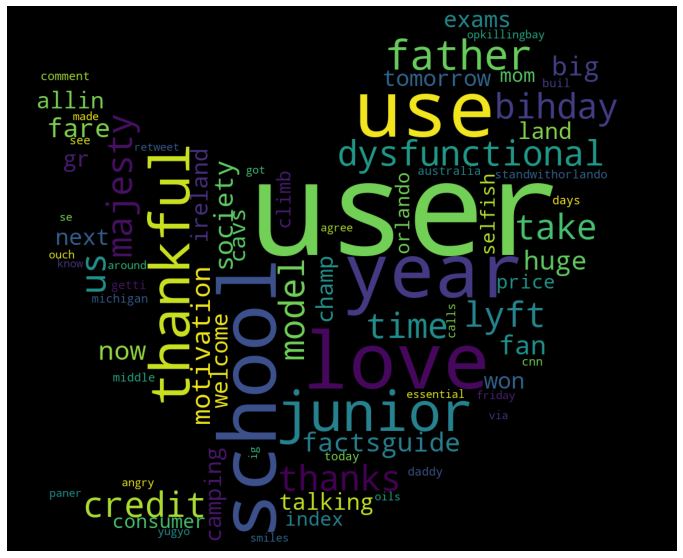

In [94]:
#Library to form wordcloud :
from wordcloud import WordCloud, ImageColorGenerator
import requests
import numpy as np
from PIL import  *


#Library to plot the wordcloud :
import matplotlib.pyplot as plt

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)



#Generating the wordcloud :
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(tweet_text_2) #important to provide mask to give better visualitization 

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

Creating Bar Graph

In [95]:
df

,id,label,tweet
0,1,0,youser when a father is dysfyounctional and is...
1,2,0,youser youser thanks for lyfeatyouring credit ...
2,3,0,bihday yoyour majesty
3,4,0,model i love you take with you all the time in...
4,5,0,factsgyouide soriginal contentthat isty now mo...
...,...,...,...
31957,31958,0,ate youser isz that yoyouyouyouai
31958,31959,0,to see nina tyourner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,youser sikh temple vandalised in in calgary ws...


In [ ]:
df['label'].value_counts() #counting the 0 and 1 for the label

0    29720
1     2242
Name: label, dtype: int64

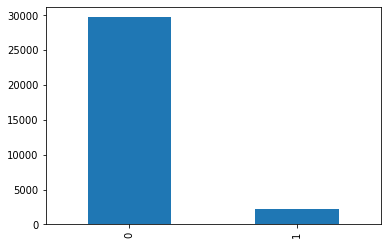

In [96]:
df['label'].value_counts().plot.bar() #ploting the data

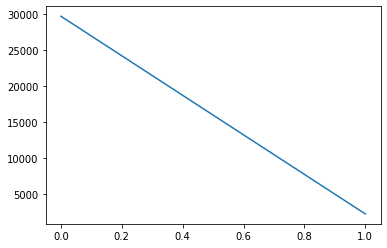

In [97]:
df['label'].value_counts().plot.line() # to see what a line graph would look like